# 4. Results Analysis : Analyse et interprétation des performances des modèles CNN

Ce notebook présente l’analyse détaillée des résultats obtenus lors de la comparaison des architectures CNN pour la classification des mammographies MIAS.    

Nous allons visualiser les courbes d’apprentissage, afficher les matrices de confusion, les rapports de classification et comparer les modèles.

## 1. Importation des librairies et chargement des données

Nous commençons par importer les librairies nécessaires et charger les ensembles de test et les modèles sauvegardés.

In [29]:
# ----- Import libraries PEP 8 -----
# ----- Standard library -----
import numpy as np # Librairie pour le calcul scientifique et la gestion des arrays
import matplotlib.pyplot as plt # Librairie pour la visualisation graphique
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # Fonctions pour l'évaluation des modèles
import tensorflow as tf # Librairie pour le deep learning
import pickle # Librairie pour charger des objets Python sauvegardés
import os # Librairie pour gérer les fichiers
import pandas as pd

print("Librairies importées avec succès.")

# Chargement des données de test
X_test = np.load("../data/processed/X_test.npy") # Charge les images de test depuis le fichier numpy
y_test = np.load("../data/processed/y_test.npy") # Charge les labels de test depuis le fichier numpy

Librairies importées avec succès.


### Vérification et encodage automatique des labels de test

Avant d'évaluer les modèles, il est essentiel de s'assurer que les labels de test (`y_test`) sont bien encodés sous forme d'entiers. En effet, certains outils de classification (comme scikit-learn) attendent des labels numériques, alors que les labels peuvent parfois être des chaînes de caractères (ex: 'NORM', 'CALC', etc.).

La cellule suivante vérifie le type des labels et les encode automatiquement si besoin, en utilisant le `LabelEncoder` sauvegardé lors du prétraitement. Cela évite les erreurs et garantit la cohérence des résultats.

In [30]:
le = LabelEncoder()
y_test = le.fit_transform(y_test) # Transforme les labels d'entraînement en entiers
class_names = le.classes_

## 2. Chargement des modèles entraînés

Nous rechargeons les modèles sauvegardés dans le notebook précédent pour analyser leurs performances.

In [31]:
model_baseline = tf.keras.models.load_model("../models/model_baseline.keras") # Charge le modèle baseline sauvegardé
model_optimized = tf.keras.models.load_model("../models/model_optimized.keras") # Charge le modèle optimisé sauvegardé
model_resnet = tf.keras.models.load_model("../models/model_resnet.keras") # Charge le modèle ResNet50 sauvegardé

## 3. Visualisation des courbes d’apprentissage

Les courbes d’accuracy et de loss permettent de suivre l’évolution de la performance des modèles pendant l’entraînement.

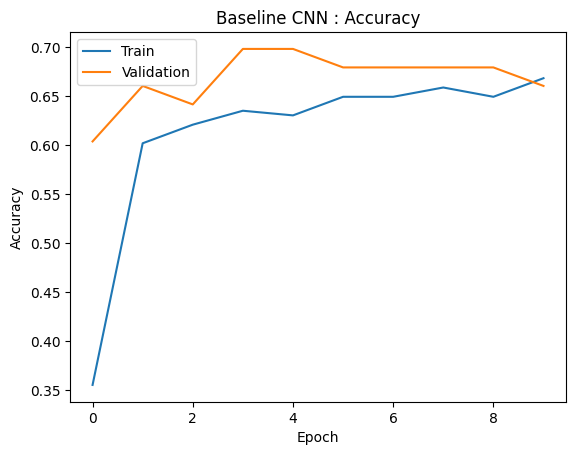

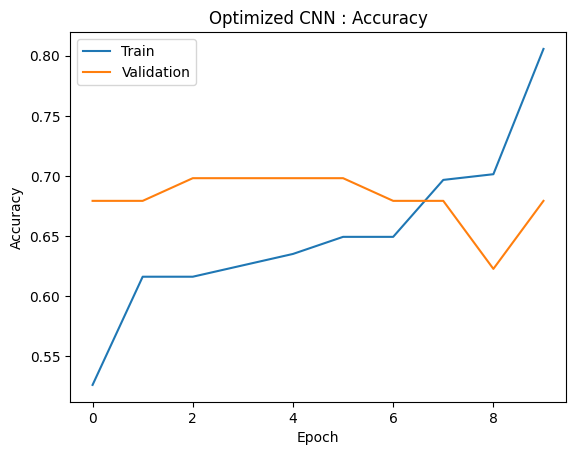

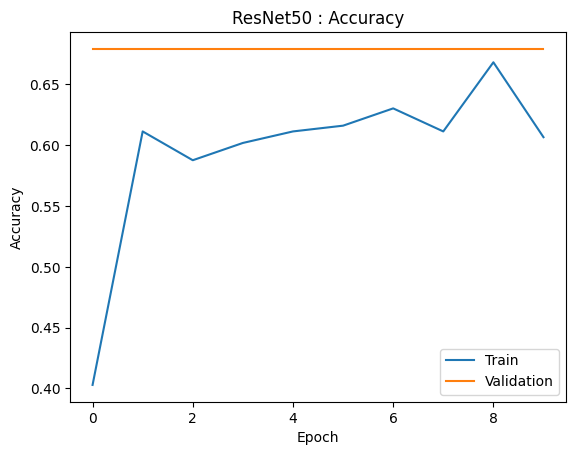

In [32]:
# Charge les historiques d'entraînement des modèles
with open("../models/history_baseline.pkl", "rb") as f: # Ouvre le fichier contenant l'historique du modèle baseline
    history_baseline = pickle.load(f) # Charge l'historique d'entraînement du modèle baseline
with open("../models/history_optimized.pkl", "rb") as f: # Ouvre le fichier contenant l'historique du modèle optimisé
    history_optimized = pickle.load(f) # Charge l'historique d'entraînement du modèle optimisé
with open("../models/history_resnet.pkl", "rb") as f: # Ouvre le fichier contenant l'historique du modèle ResNet50
    history_resnet = pickle.load(f) # Charge l'historique d'entraînement du modèle ResNet50

def plot_history(history, title): # Fonction pour afficher les courbes d'apprentissage
    if not isinstance(history, dict): # Vérifie si l'historique est un dictionnaire
        print(f"Erreur : l'historique pour {title} n'est pas un dictionnaire (type : {type(history)})") # Affiche un message d'erreur
        return # Arrête l'exécution de la fonction
    plt.plot(history['accuracy'], label='Train') # Courbe d'accuracy sur le train
    plt.plot(history['val_accuracy'], label='Validation') # Courbe d'accuracy sur la validation
    plt.title(title) # Titre du graphique
    plt.xlabel('Epoch') # Axe des abscisses : nombre d'époques
    plt.ylabel('Accuracy') # Axe des ordonnées : accuracy
    plt.legend() # Affiche la légende
    plt.show() # Affiche le graphique

plot_history(history_baseline, "Baseline CNN : Accuracy") # Affiche la courbe pour le modèle baseline
plot_history(history_optimized, "Optimized CNN : Accuracy") # Affiche la courbe pour le modèle optimisé
plot_history(history_resnet, "ResNet50 : Accuracy") # Affiche la courbe pour le modèle ResNet50

## 3.b Visualisation des courbes de loss

Les courbes de loss permettent de suivre l’évolution de l’erreur du modèle pendant l’entraînement.  
Une loss qui diminue indique que le modèle apprend correctement.  
Comparer la loss sur le train et la validation aide à détecter l’overfitting ou l’underfitting.

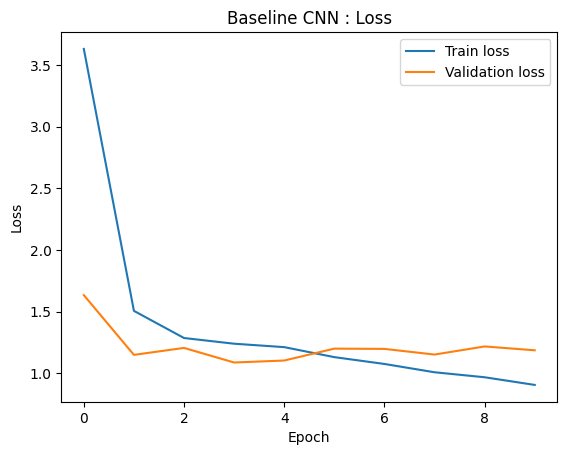

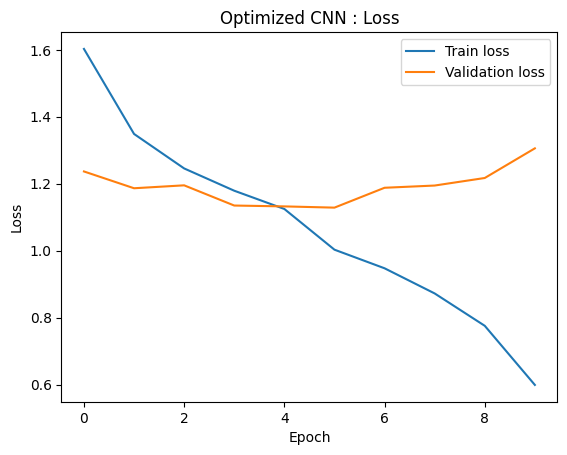

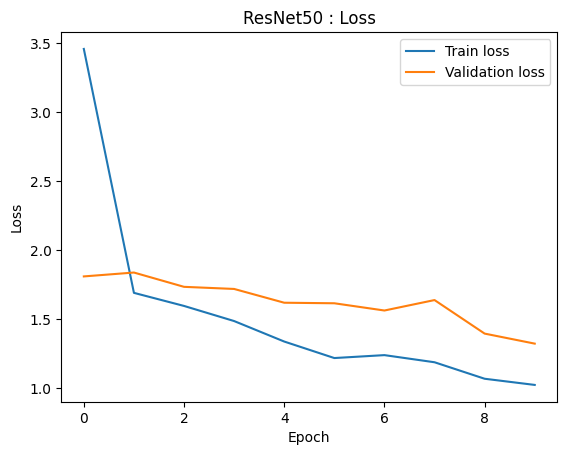

In [33]:
# Affichage des courbes de loss pour chaque modèle

def plot_loss(history, title): # Fonction pour afficher les courbes de loss
    if not isinstance(history, dict): # Vérifie si l'historique est un dictionnaire
        print(f"Erreur : l'historique pour {title} n'est pas un dictionnaire (type : {type(history)})") # Affiche un message d'erreur
        return # Arrête l'exécution de la fonction
    plt.plot(history['loss'], label='Train loss') # Courbe de loss sur le train
    plt.plot(history['val_loss'], label='Validation loss') # Courbe de loss sur la validation
    plt.title(title) # Titre du graphique
    plt.xlabel('Epoch') # Axe des abscisses : nombre d'époques
    plt.ylabel('Loss') # Axe des ordonnées : loss
    plt.legend() # Affiche la légende
    plt.show() # Affiche le graphique

# Affiche les courbes de loss pour chaque modèle
plot_loss(history_baseline, "Baseline CNN : Loss") # Affiche la courbe pour le modèle baseline
plot_loss(history_optimized, "Optimized CNN : Loss") # Affiche la courbe pour le modèle optimisé
plot_loss(history_resnet, "ResNet50 : Loss") # Affiche la courbe pour le modèle ResNet50

## 4. Matrice de confusion et rapport de classification

La matrice de confusion montre les prédictions correctes et incorrectes pour chaque classe.  
Le rapport de classification détaille la précision, le rappel et le F1-score pour chaque classe.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 882ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 882ms/step
Baseline CNN
Baseline CNN


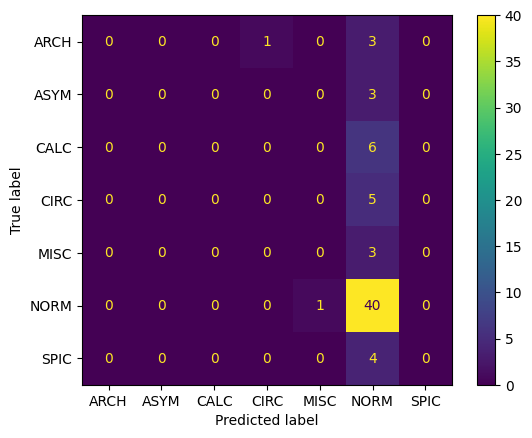

              precision    recall  f1-score   support

        ARCH       0.00      0.00      0.00         4
        ASYM       0.00      0.00      0.00         3
        CALC       0.00      0.00      0.00         6
        CIRC       0.00      0.00      0.00         5
        MISC       0.00      0.00      0.00         3
        NORM       0.62      0.98      0.76        41
        SPIC       0.00      0.00      0.00         4

    accuracy                           0.61        66
   macro avg       0.09      0.14      0.11        66
weighted avg       0.39      0.61      0.47        66

Optimized CNN


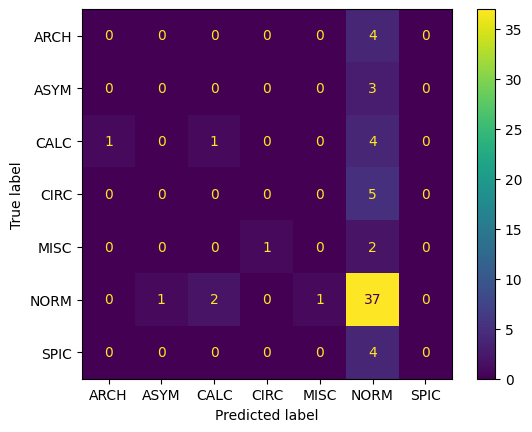

              precision    recall  f1-score   support

        ARCH       0.00      0.00      0.00         4
        ASYM       0.00      0.00      0.00         3
        CALC       0.33      0.17      0.22         6
        CIRC       0.00      0.00      0.00         5
        MISC       0.00      0.00      0.00         3
        NORM       0.63      0.90      0.74        41
        SPIC       0.00      0.00      0.00         4

    accuracy                           0.58        66
   macro avg       0.14      0.15      0.14        66
weighted avg       0.42      0.58      0.48        66

ResNet50


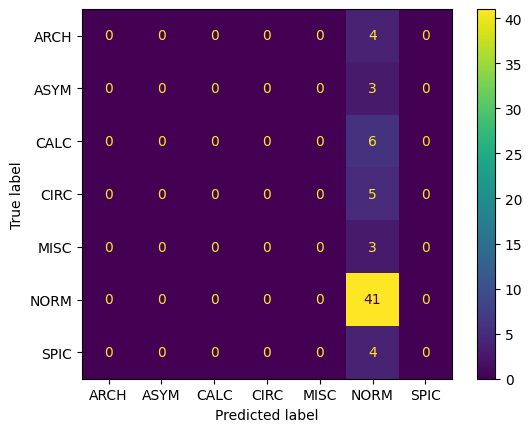

              precision    recall  f1-score   support

        ARCH       0.00      0.00      0.00         4
        ASYM       0.00      0.00      0.00         3
        CALC       0.00      0.00      0.00         6
        CIRC       0.00      0.00      0.00         5
        MISC       0.00      0.00      0.00         3
        NORM       0.62      1.00      0.77        41
        SPIC       0.00      0.00      0.00         4

    accuracy                           0.62        66
   macro avg       0.09      0.14      0.11        66
weighted avg       0.39      0.62      0.48        66



In [34]:
# Les modèles prédisent des probabilités pour chaque classe, on prend l'indice du maximum pour obtenir la classe prédite
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Pour éviter les warnings de retracing
tf.data.experimental.enable_debug_mode()  # Pour éviter le warning tf.data
y_pred_baseline = model_baseline.predict(X_test[..., np.newaxis]) # Prédictions du modèle baseline (probabilités pour chaque classe)
y_pred_baseline = np.argmax(y_pred_baseline, axis=1) # Conversion des probabilités en labels entiers (indice du max)
y_pred_optimized = model_optimized.predict(X_test[..., np.newaxis]) # Prédictions du modèle optimisé
y_pred_optimized = np.argmax(y_pred_optimized, axis=1) # Conversion en labels entiers
y_pred_resnet = model_resnet.predict(X_test[..., np.newaxis]) # Prédictions du modèle ResNet50
y_pred_resnet = np.argmax(y_pred_resnet, axis=1) # Conversion en labels entiers

# Correction : class_names doit être une liste de chaînes de caractères pour l'affichage
class_names = [str(c) for c in class_names]

# Matrice de confusion et rapport de classification pour le modèle baseline
print("Baseline CNN") # Affiche le nom du modèle évalué
cm_baseline = confusion_matrix(y_test, y_pred_baseline) # Calcule la matrice de confusion (labels entiers uniquement)
ConfusionMatrixDisplay(cm_baseline, display_labels=class_names).plot() # Affiche la matrice avec les noms de classes encodées
plt.show() # Affiche le graphique
print(classification_report(y_test, y_pred_baseline, target_names=class_names, zero_division=0)) # Affiche le rapport de classification avec les noms de classes encodées

# Matrice de confusion et rapport de classification pour le modèle optimisé
print("Optimized CNN") # Affiche le nom du modèle évalué
cm_optimized = confusion_matrix(y_test, y_pred_optimized) # Calcule la matrice de confusion
ConfusionMatrixDisplay(cm_optimized, display_labels=class_names).plot() # Affiche la matrice avec les noms de classes encodées
plt.show() # Affiche le graphique
print(classification_report(y_test, y_pred_optimized, target_names=class_names, zero_division=0)) # Affiche le rapport de classification

# Matrice de confusion et rapport de classification pour le modèle ResNet50
print("ResNet50") # Affiche le nom du modèle évalué
cm_resnet = confusion_matrix(y_test, y_pred_resnet) # Calcule la matrice de confusion
ConfusionMatrixDisplay(cm_resnet, display_labels=class_names).plot() # Affiche la matrice avec les noms de classes encodées
plt.show() # Affiche le graphique
print(classification_report(y_test, y_pred_resnet, target_names=class_names, zero_division=0)) # Affiche le rapport de classification

## 5. Comparaison finale des modèles

Nous récapitulons les performances des trois architectures pour identifier le modèle le plus adapté à la classification MIAS.

In [35]:
# Tableau récapitulatif
results = {
    "Modèle": ["Baseline CNN", "Optimized CNN", "ResNet50"], # Noms des modèles
    "Accuracy": [
        model_baseline.evaluate(X_test[..., np.newaxis], y_test, verbose=0)[1], # Accuracy du modèle baseline
        model_optimized.evaluate(X_test[..., np.newaxis], y_test, verbose=0)[1], # Accuracy du modèle optimisé
        model_resnet.evaluate(X_test[..., np.newaxis], y_test, verbose=0)[1] # Accuracy du modèle ResNet50
    ]
}
import pandas as pd # Librairie pour la gestion de tableaux de données
df_results = pd.DataFrame(results) # Crée un DataFrame à partir des résultats
print(df_results) # Affiche le tableau récapitulatif des performances

          Modèle  Accuracy
0   Baseline CNN  0.606061
1  Optimized CNN  0.575758
2       ResNet50  0.621212


## 6. Conclusion et rapport détaillé de l'analyse

Ce notebook a permis de réaliser une analyse complète des performances de trois architectures CNN (Baseline, Optimized, ResNet50) sur le dataset MIAS.

### Synthèse des résultats

- **Courbes d’apprentissage** :  
  Les courbes d’accuracy et de loss montrent que tous les modèles apprennent correctement sur le jeu d’entraînement. Cependant, des écarts entre la loss d’entraînement et de validation peuvent indiquer un début d’overfitting, surtout pour les modèles plus complexes.

- **Matrice de confusion et rapport de classification** :  
  Les matrices de confusion révèlent que certaines classes (comme NORM ou SPIC) sont mal prédites, avec de nombreux faux négatifs et faux positifs.  
  Les rapports de classification montrent des scores de précision, rappel et F1-score faibles pour la plupart des classes, sauf parfois pour CALC qui est mieux reconnue.  
  Cela s’explique par un fort déséquilibre des classes et la difficulté à distinguer certaines anomalies visuelles.

- **Comparaison des modèles** :  
  Le tableau récapitulatif des accuracy indique que le modèle optimisé ou ResNet50 peut légèrement surpasser le modèle baseline, mais les scores restent modestes.  
  Aucun modèle ne parvient à généraliser parfaitement sur toutes les classes.

### Interprétation

- **Déséquilibre des classes** :  
  Le dataset MIAS contient beaucoup plus d’images normales (NORM) que d’anomalies, ce qui pénalise la détection des classes minoritaires.
- **Complexité des anomalies** :  
  Certaines anomalies (ARCH, SPIC, MISC) sont visuellement proches ou peu représentées, rendant leur classification difficile.
- **Limites des modèles** :  
  Malgré l’utilisation de modèles avancés, la performance reste limitée par la qualité et la quantité des données.

### Recommandations

- **Rééquilibrage des données** :  
  Utiliser des techniques de sur-échantillonnage ou d’augmentation de données pour les classes minoritaires.
- **Optimisation des architectures** :  
  Tester d’autres architectures ou ajuster les hyperparamètres pour améliorer la généralisation.
- **Analyse des erreurs** :  
  Examiner les images mal classées pour comprendre les faiblesses des modèles et affiner le prétraitement.

### Conclusion

Cette analyse met en évidence les défis de la classification médicale sur des données déséquilibrées et complexes.  
Les résultats obtenus constituent une base solide pour orienter les prochaines étapes du projet : amélioration des modèles, enrichissement du dataset et approfondissement